# Part 1: Introducing Python, Jupyter notebook cells, and functions.

## Rename this file.
You may do so by clicking on the filename to the right of the Jupyter logo at the top. Replace \[lastname\] with your last name or surname and \[firstname] with your first name or given name.

## Read this.
Computer science is an elective component of the [Meteorology 1340 series](https://www.opm.gov/policy-data-oversight/classification-qualifications/general-schedule-qualification-standards/1300/meteorology-series-1340/) and the [NOAA civil servant requirements](https://www.noaa.gov/jetstream/nws_intro/educational-requirements-for-careers-in-national-weather-service). One of the American Meteorological Society's [program-level outcomes](https://www.ametsoc.org/index.cfm/ams/about-ams/ams-statements/statements-of-the-ams-in-force/bachelors-degree-in-atmospheric-science/) for a degree in atmospheric science is
>"interpret and use one or more commonly used computer programming languages (e.g., Python, MATLAB, FORTRAN) to investigate problems in the atmospheric sciences, analyze data, and create relevant visualizations."

This lab is one of two in which you'll analyze weather data from national forecast models and reanalyses using Python. This will help you to visualize some of the calculations you perform, and will help you practice skills that are in demand by employers in and out of the atmospheric sciences.

## Double-click here and follow the instructions.
This is a cell. Code and text in a Jupyter Notebook are contained in cells like this one. By double-clicking, you hopefully changed this cell so that you can edit its contents.

Do you see the pulldown menu to the right of the small icons above that says "Markdown"? This cell contains text formatted with Markdown. Learn all about Markdown [here](https://www.markdownguide.org/).

When you are done editing this cell, you can change it back to display mode in a couple of ways.
1. You can click the play icon near the top of the notebook.
2. You can press shift and enter at the same time.

## Click on the cell below and follow its instructions.

In [ ]:
"""
This cell contains code.
If you look at the pulldown menu that said "Markdown" before,
you will notice that it changed to "Code" after you clicked this cell.

You can run a cell of code the same way you display a cell of Markdown.
1. You can click the play icon near the top of the notebook.
2. You can press shift and enter at the same time.
"""

# Run this cell and see what happens.
# Notice that anything between the triple-quotes or after # symbols is ignored.

print('Hello, world!')

## Run the cell below.
It will probably take a few moments to run. It contains import lines. Learn more about import lines [here](https://www.w3schools.com/python/ref_keyword_import.asp).

In [2]:
# these import lines open up software that makes python
# more able to do science and display the results
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndimage
import xarray as xr
from metpy.plots import add_metpy_logo
import latexify
import warnings
warnings.filterwarnings('ignore')

# Center the map view over the continental United States
crs = ccrs.LambertConformal(central_longitude=-100.0, central_latitude=45.0)

# Function used to create the map subplots
def plot_background(ax):
    ax.set_extent([235., 290., 20., 55.])
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5, edgecolor='gray')
    ax.add_feature(cfeature.STATES, linewidth=0.5, edgecolor='gray')
    ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='gray')
    return ax

## Read this.
Programming languages use functions, very much like math. You will edit some functions later on. But first, here is an example function that calculates ε (epsilon), or the radio $R_d/R_v$.

Once defined, functions can be used over and over. It's a big part of what makes coding so powerful.

In today's lab, I use the [latexify package](https://github.com/google/latexify_py) to display functions as equations. It's just a nice way to make sure that the function you have created represents the equation you are trying to code up.
## Read and run the cell below.

In [3]:
"""
If you are new to coding functions, the comments in this code below will help you.
"""
# this latexify line just tells Jupyter to try to represent the function that follows as a mathematical expression
@latexify.function

# def is short for "define." This next line defines a function called "calc_epsilon." It operates on two inputs, R_d and R_v.
def calc_epsilon(R_d, R_v):
    # Notice that the next few lines of code are indented?
    # These indented lines are 'inside' calc_epsilon.
    
    # "Return" means that this function spits out an answer.
    # In this case, the answer it spits out is R_d/R_v
    return R_d/R_v

# The code is no longer indented.
# We are no longer 'inside' calc_epsilon

# This next line just prints the text shown to the screen. You did this up above when you printed "hello world".
print("Here's the current version of ε:")

# This line will display the function calc_epsilon when it is run.
# Since we did @latexify.function beforehand, Jupyter will try to display the function as an equation
calc_epsilon

Here's the current version of ε:


## Test `calc_epsilon` by editing and running the cell below.

In [4]:
"""
These two lines create variables named a and b.
Change the values given to a and b and re-run this cell.
Try to predict the outcome.
"""
a = 4
b = 2

# This line prints the result of calc_epsilon when you feed it the values stored in a and b
# Does the return value make sense, given the values you plug in?
print(f"If R_d={a} and R_v={b}, then ε is {calc_epsilon(a, b)}.")

If R_d=4 and R_v=2, then ε is 2.0.


# Part 2: Coding up two functions

## Fix the function below to calculate $w=f(q)$.

In [5]:
"""
If you have q, you can calculate w.
The expression for w in terms of q is given somewhere in §3.4.2.
I created a function below with an incorrect expression.
"""
@latexify.function
def calc_w(q):
    # When I created this, it calculated w=1.1q. This is, of course, incorrect. Correct it!
    return q*1.1
print("Here's the current version of w (FIX IT AND DELETE THIS PARENTHETICAL STATEMENT):")
calc_w

Here's the current version of w (FIX IT AND DELETE THIS PARENTHETICAL STATEMENT):


## Test `calc_w` by editing and running the cell below.

In [6]:
"""
This line creates a variable named c.
Change the value given to c and re-run this cell.
Try to predict the outcome.
"""
c = 1

# This line prints the result of calc_w when you feed it the value stored in c
print(f"If q={c} then w is {calc_w(c)}.")

If q=1 then w is 1.1.


## Fix the function below to calculate $T_v=f(T, q, ε)$.

In [7]:
"""
If you have T and q then you can calculate T_v.
Replace the incorrect expression for T_v below with equation 3.48 in §3.4.3.
"""

@latexify.function
def calc_T_v(T, q, epsilon):
    # When I created this, I calculated T_v obviously incorrectly.
    return T*(1.01 + 0*(epsilon+q))
print("Here's the current version of T_v (FIX IT AND DELETE THIS PARENTHETICAL STATEMENT):")
calc_T_v

Here's the current version of T_v (FIX IT AND DELETE THIS PARENTHETICAL STATEMENT):


## Test `calc_T_v` using the cell below.

In [15]:
d = 300
e = 0.005
f = 0.6

print(f"If T={d}, q={e}, and ε={f}, then T_v is {calc_T_v(d, e, f)}.")

If T=300, q=0.005, and ε=0.6, then T_v is 301.0.


# Part 3: Analyzing real data.
For this lab, we will use data from the [North American Mesoscale](https://www.ncei.noaa.gov/products/weather-climate-models/north-american-mesoscale) (NAM) model. You can download data [here](https://www.ncei.noaa.gov/data/north-american-mesoscale-model/access/), and you can see all the variables that were in the file I downloaded [here] https://www.nco.ncep.noaa.gov/pmb/products/nam/nam.t00z.awip3d00.tm00.grib2.shtml).

The NAM data are distributed in the [grib2](https://www.nco.ncep.noaa.gov/pmb/docs/grib2/grib2_doc/) file format. This is the [World Meteorological Organization](https://wmo.int/) standard file format for gridded data. You can think of it as a bunch of maps converted to JPEG images stacked on top of each other, with one map per vertical level and variable.


## Run the cell below to read the model data.

In [16]:
# open the grib dataset and store it in a variable "ds"
with xr.open_dataset('nam.t00z.awip3d00.tm00.grib2', engine='cfgrib', filter_by_keys={'stepType': 'instant', 'typeOfLevel': 'surface'}) as ds:

    # read the longitude data into variable "lon_2d"
    lon_2d = ds['longitude']
    
    # read the latitude data into variable "lat_2d"
    lat_2d = ds['latitude']
    
    # read in the specific humidity data (q) into variable "specific_humidity"
    specific_humidity = ds['q']

    # read in the air temperature data (T) into variable "air_temp"
    air_temp = ds['t']

## Run the cell below to calculate $\epsilon$ based on measured $R_d$ and $R_v$.

In [10]:
R_dry_air = 287.05 # g kg^-1 K^-1
R_water_vapor = 461.52 # g kg^-1 K^-1
epsilon = calc_epsilon(R_dry_air, R_water_vapor)
print(f"ε={epsilon}")

ε=0.6219665453284798


## Run the cell below to calculate $w$ from the forecasted $q$.

In [11]:
# Make sure the units of q are kg/kg, not g/kg; otherwise our calculations will be off
specific_humidity = specific_humidity.metpy.convert_units('kg kg**-1')

# calculate w!
mixing_ratio = calc_w(specific_humidity)

## Run the cell below to calculate $T_v$ from the forecasted $T$ and $q$.

In [12]:
# Make sure the units of q are kg/kg, not g/kg; otherwise our calculations will be off.
specific_humidity = specific_humidity.metpy.convert_units('kg kg**-1')

# Make sure the units of T are K, not °C; otherwise our calculations will be off.
air_temp = air_temp.metpy.convert_units('degK')

# calculate T_v!
virt_temp = air_temp.copy(data=calc_T_v(air_temp, specific_humidity, epsilon))

## Take a look at the graphs below before completing this next step.
The graphs below should look wrong when you first open this lab. This is because they use $w$ and $T_v$ as I have (incorrectly) calculated them. But familiarize yourself with the variables that are shown. Try to guess what the graphs will look like after you replot them with the correct $w$ and $T_v$.

## Did you do that? Great! Now run the cell below to re-plot the graphs below.
Take a look and see if your results make sense. We'll talk about them in class.

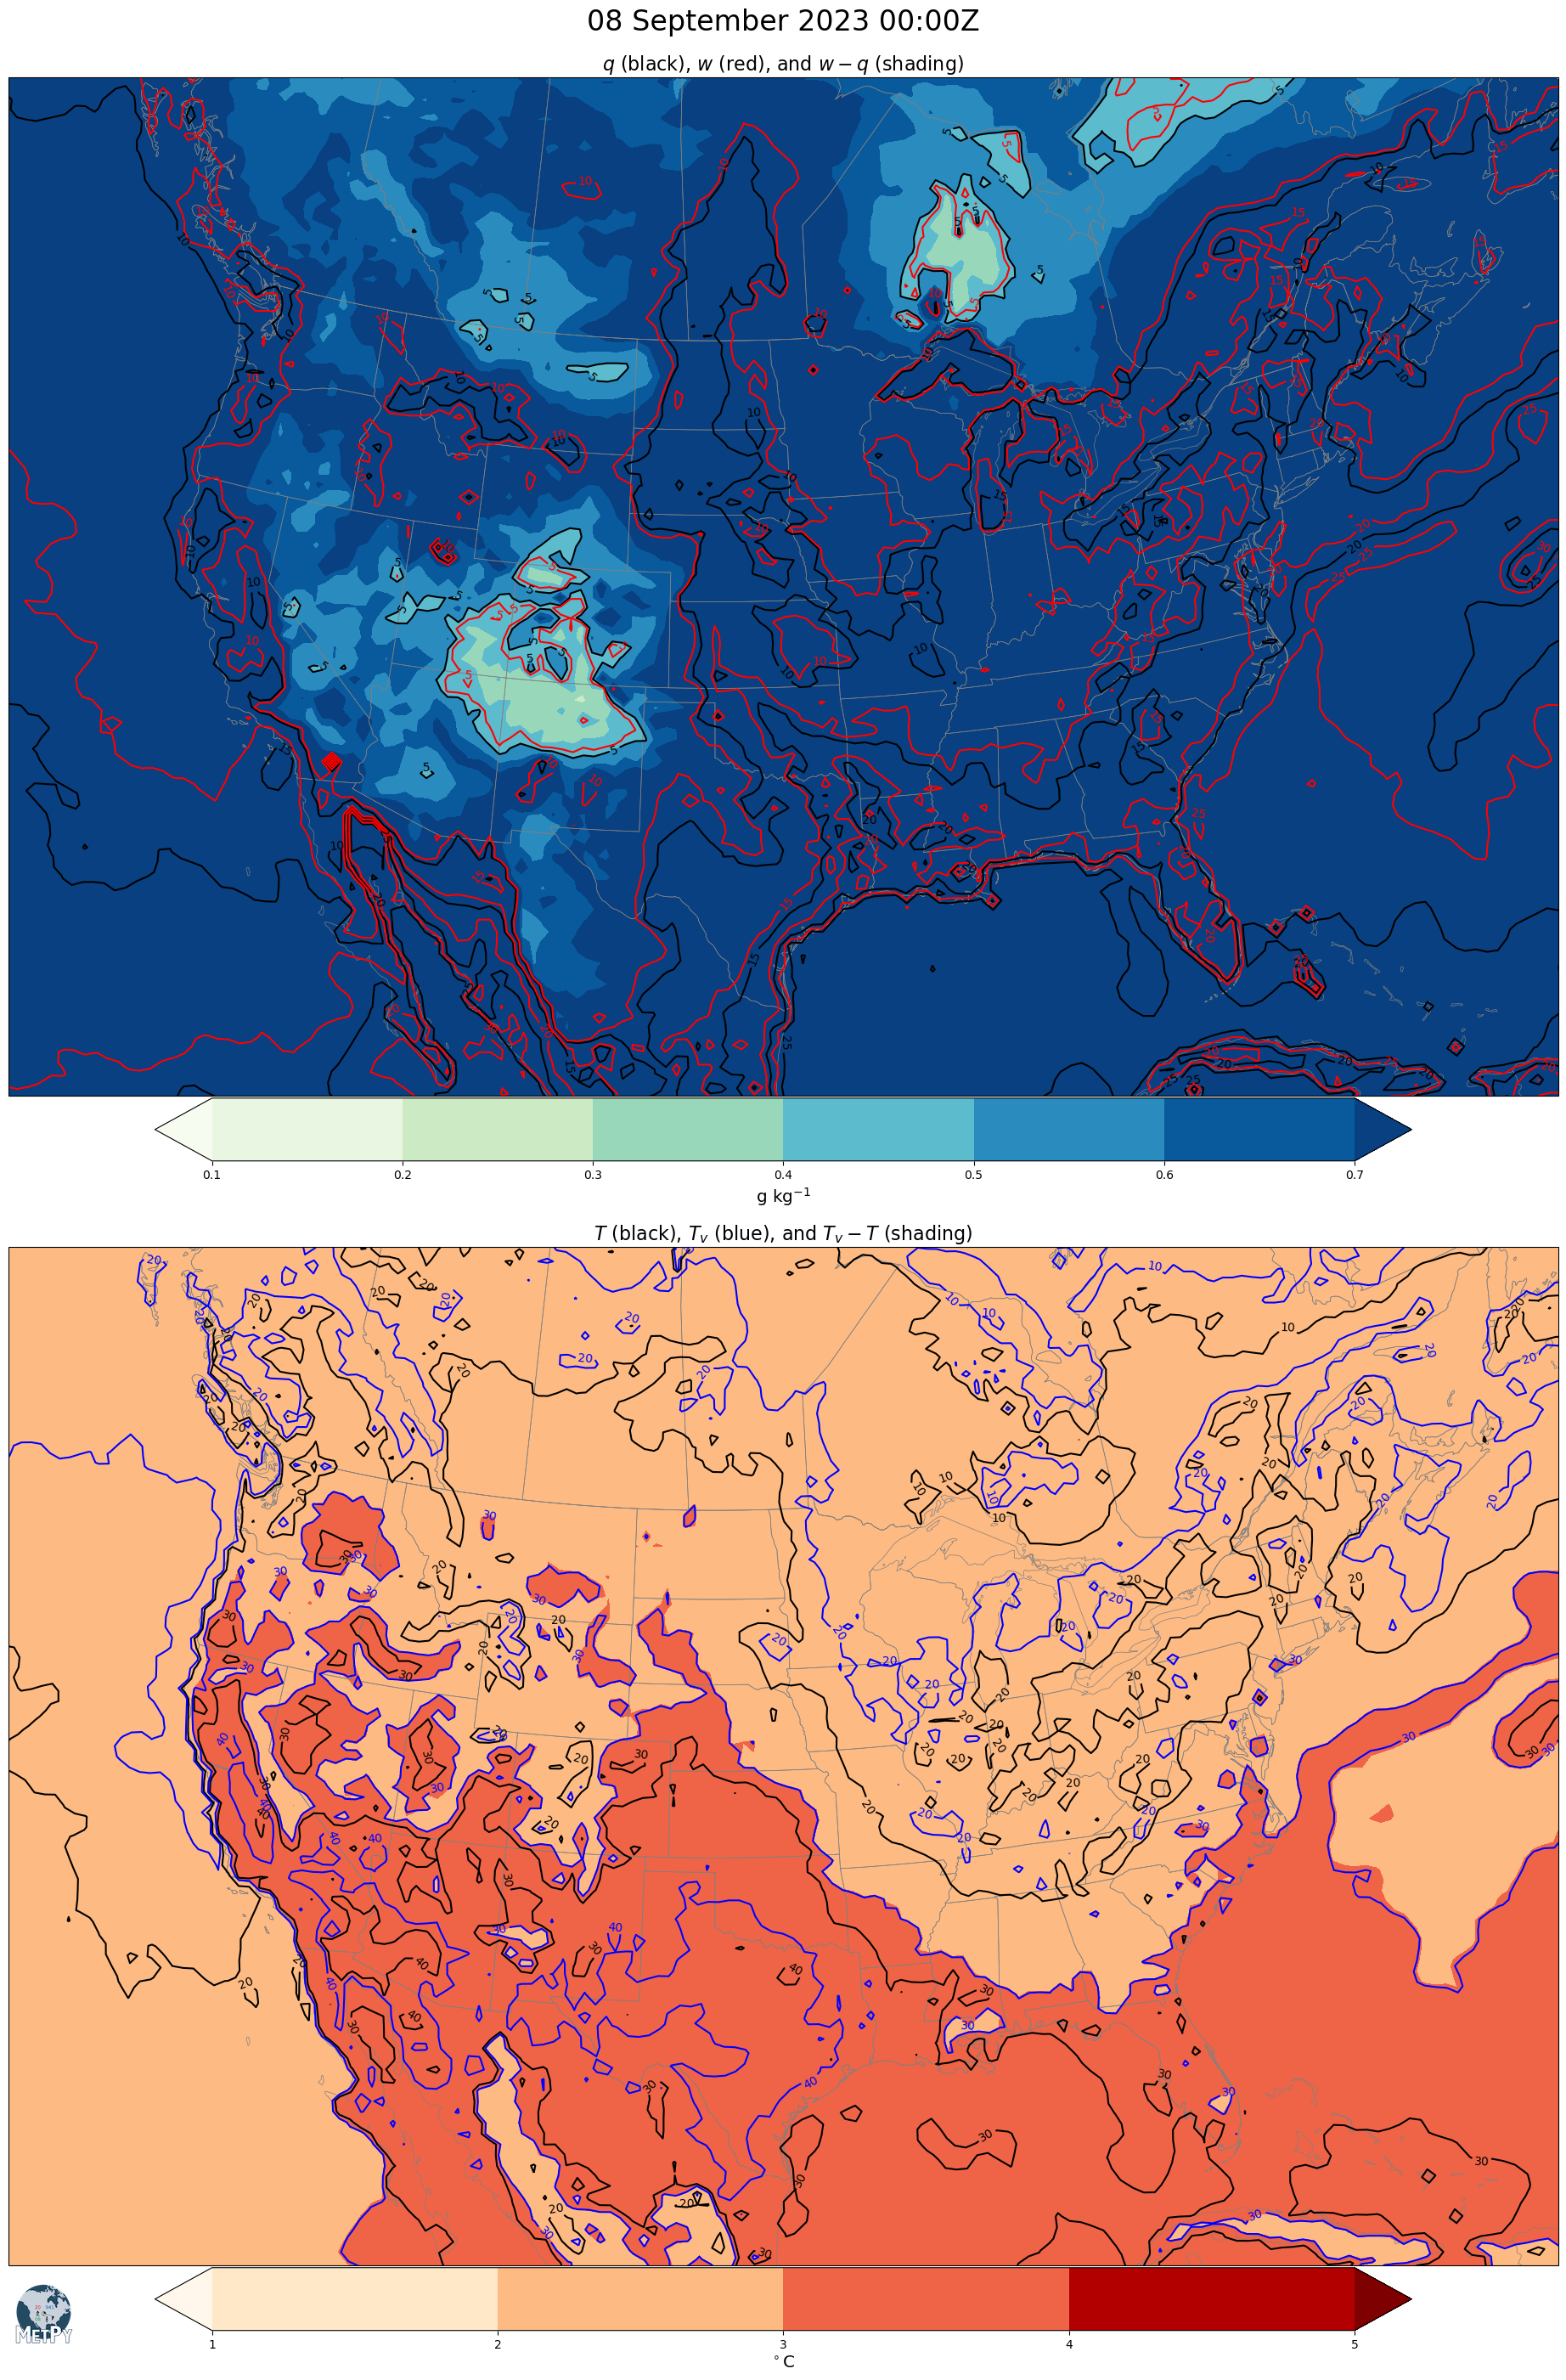

In [13]:
# convert units for plotting
specific_humidity = specific_humidity.metpy.convert_units('g kg**-1')
mixing_ratio = mixing_ratio.metpy.convert_units('g kg**-1')
air_temp = air_temp.metpy.convert_units('degC')
virt_temp = virt_temp.metpy.convert_units('degC')

# Create the figure and plot background on different axes
fig, axarr = plt.subplots(nrows=2, ncols=1, figsize=(20, 28), constrained_layout=True,
                          subplot_kw={'projection': crs})
add_metpy_logo(fig, 14, 40, size='small')
axlist = axarr.flatten()
for ax in axlist:
    plot_background(ax)

# Upper left plot - specific humidity
c1a = axlist[0].contour(lon_2d, lat_2d, specific_humidity, [5, 10, 15, 20, 25, 30], colors='black',
                       transform=ccrs.PlateCarree())
c1b = axlist[0].contour(lon_2d, lat_2d, mixing_ratio, [5, 10, 15, 20, 25, 30], colors='red',
                       transform=ccrs.PlateCarree())
cf1 = axlist[0].contourf(lon_2d, lat_2d, mixing_ratio-specific_humidity, [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7], cmap='GnBu',
                       transform=ccrs.PlateCarree(), zorder=0, extend='both')
axlist[0].clabel(c1a, fontsize=10, inline=1, inline_spacing=1, fmt='%i', rightside_up=True)
axlist[0].clabel(c1b, fontsize=10, inline=1, inline_spacing=1, fmt='%i', rightside_up=True)
cb1 = fig.colorbar(cf1, ax=axlist[0], orientation='horizontal', shrink=0.74, pad=0)
cb1.set_label('g kg$^{-1}$', size='x-large')

axlist[0].set_title('$q$ (black), $w$ (red), and $w-q$ (shading)', fontsize=16)

# Lower left plot - surface temperatures
c2a = axlist[1].contour(lon_2d, lat_2d, air_temp, [10, 20, 30, 40], colors='black',
                         transform=ccrs.PlateCarree())
c2b = axlist[1].contour(lon_2d, lat_2d, virt_temp, [10, 20, 30, 40], colors='blue',
                         transform=ccrs.PlateCarree())
cf2 = axlist[1].contourf(lon_2d, lat_2d, virt_temp-air_temp, [1, 2, 3, 4, 5], cmap='OrRd',
                       transform=ccrs.PlateCarree(), zorder=0, extend='both')
axlist[1].clabel(c2a, fontsize=10, inline=1, inline_spacing=1, fmt='%i', rightside_up=True)
axlist[1].clabel(c2b, fontsize=10, inline=1, inline_spacing=1, fmt='%i', rightside_up=True)
cb2 = fig.colorbar(cf2, ax=axlist[1], orientation='horizontal', shrink=0.74, pad=0)
cb2.set_label('$^\circ$C', size='x-large')
axlist[1].set_title('$T$ (black), $T_v$ (blue), and $T_v-T$ (shading)', fontsize=16)

# Set height padding for plots
fig.set_constrained_layout_pads(w_pad=0., h_pad=0.1, hspace=0., wspace=0.)

# Set figure title
fig.suptitle(ds['time'].dt.strftime('%d %B %Y %H:%MZ').values, fontsize=24)

# Display the plot
plt.show()

## Turn this in!
Go to the "File" menu just below the Jupyter logo, choose "Save and Export Notebook As", and then "HTML".
That should create an HTML file that contains everything you see in this notebook.
Download that HTML file, open it in a browser to make sure it looks good, and submit it to Canvas for your assignment.